In [1]:
%matplotlib inline 
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
from twitter_db import *

In [2]:
"""
    This scripts analyses tweets to ascertain the most popular programming language between python, javascript and ruby
    It then attempts to print out links related to these languages if found in the tweet
"""

'\n    This scripts analyses tweets to ascertain the most popular programming language between python, javascript and ruby\n    It then attempts to print out links related to these languages if found in the tweet\n'

In [3]:
db = TwitterDataBase()
tweets_df = pd.DataFrame()

In [4]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [5]:
tweets_df['tweet'] = list(map(lambda t: t['tweet'],db.getAllTweets(**{})))

In [6]:
# this is not a fool-proof - the word 'ruby' is more popular than the other 2.
# this does not imply that 'ruby' is a more popular language
# crossng this with relevant tweets (done later) will get better results
tweets_df['python'] = tweets_df['tweet'].apply(lambda t: word_in_text('python', t))
tweets_df['javascript'] = tweets_df['tweet'].apply(lambda t: word_in_text('javascript', t))
tweets_df['ruby'] = tweets_df['tweet'].apply(lambda t: word_in_text('ruby', t))

In [7]:
python_count = tweets_df['python'].value_counts()[True] if [True] in tweets_df['python'].values else 0
javascript_count = tweets_df['javascript'].value_counts()[True] if [True] in tweets_df['javascript'].values else 0
ruby_count = tweets_df['ruby'].value_counts()[True] if [True] in tweets_df['ruby'].values else 0    


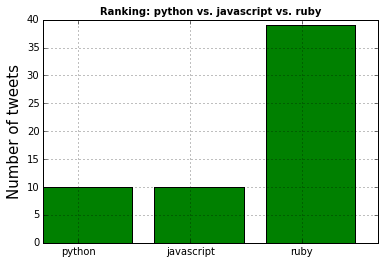

In [8]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [python_count, javascript_count, ruby_count]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [9]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [10]:
# Find tweets that mention keywords 'programming' and 'tutorial'
# Add this as a new column called 'relevant'
tweets_df['relevant'] = tweets_df['tweet'].apply(lambda t: word_in_text('programming', t) or word_in_text('tutorial', t))
# Extract links and add as another column
tweets_df['link'] = tweets_df['tweet'].apply(lambda t: extract_link(t))

In [11]:
tweets_relevant = tweets_df[tweets_df['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

In [12]:
if len(tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']) != 0:
    print("Links to Python programming:")
    print(tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link'])

if len(tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link']) != 0:
    print("Links to Javascript programming:")
    print(tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link'])
    
if len(tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link']) != 0:    
    print("Links to Ruby programming:")
    print(tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link'])